# Clean & Analyze Social Media Usage Data

## Introduction

Social media has become a ubiquitous part of modern life, with platforms such as Instagram, Twitter, and Facebook serving as essential communication channels. Social media data sets are vast and complex, making analysis a challenging task for businesses and researchers alike. In this project, we explore a simulated social media, for example Tweets, data set to understand trends in likes across different categories.

## Project Scope

The objective of this project is to analyze tweets (or other social media data) and gain insights into user engagement. We will explore the data set using visualization techniques to understand the distribution of likes across different categories. Finally, we will analyze the data to draw conclusions about the most popular categories and the overall engagement on the platform.

## Importing Required Libraries

Import all the necessary libraries that will be used in the project: pandas, numpy, matplotlib, seaborn, and random libraries.

Pandas is a library used for data manipulation and analysis. Numpy is a library used for numerical computations. Matplotlib is a library used for data visualization. Seaborn is a library used for statistical data visualization. Random is a library used to generate random numbers.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

## Generate random data for the social media data

In [2]:
# Define a list of categories for the social media experiment
categories = ['Food', 'Travel', 'Fashion', 'Fitness', 'Music', 'Culture', 'Family', 'Health']

# Define the number of entries (n)
n = 500

data = {
    'Date': pd.date_range('2021-01-01', periods=n),
    'Category': [random.choice(categories) for _ in range(n)],
    'Likes': np.random.randint(0, 10000, size=n)
}

## Load the data into a Pandas DataFrame and Explore the data

In [23]:
df = pd.DataFrame(data)
# Print the DataFrame head
df.head()

,Date,Category,Likes
0,2021-01-01,Culture,188
1,2021-01-02,Fitness,5359
2,2021-01-03,Health,5572
3,2021-01-04,Fashion,9375
4,2021-01-05,Travel,9321


In [24]:
# Print the DataFrame information
print("DataFrame Information:")
df.info()

DataFrame Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      500 non-null    datetime64[ns]
 1   Category  500 non-null    object        
 2   Likes     500 non-null    int32         
dtypes: datetime64[ns](1), int32(1), object(1)
memory usage: 9.9+ KB


In [25]:
# Print the DataFrame description
df.describe()

,Date,Likes
count,500,500.000000
mean,2021-09-07 12:00:00,4874.536000
min,2021-01-01 00:00:00,4.000000
25%,2021-05-05 18:00:00,2181.500000
50%,2021-09-07 12:00:00,4885.500000
75%,2022-01-10 06:00:00,7574.250000
max,2022-05-15 00:00:00,9974.000000
std,NaN,2975.531106


##### **Wide Spread of Likes:** 
- The likes range from a minimum of 4 to a maximum of 9,974, showing a huge variation.
- The standard deviation (2975.53) is quite high, meaning engagement is inconsistent.

In [26]:
# Print the count of each 'Category' element
df['Category'].value_counts()

Category
Family     82
Music      73
Food       62
Culture    61
Health     60
Fashion    56
Fitness    55
Travel     51
Name: count, dtype: int64

## Clean the Data

In [34]:
# Remove all the null data
df.dropna()
df.isnull().sum()

Date        0
Category    0
Likes       0
dtype: int64

In [35]:
# Remove duplicate data
df.duplicated().sum()

0

In [36]:
duplicated_rows= df[df.duplicated()]
print('Number of duplicated rows: ', duplicated_rows.shape)

Number of duplicated rows:  (0, 3)


In [37]:
df.drop_duplicates(inplace=True)

In [38]:
# Convert the DataFRame field to a datetime
df['Date'] = pd.to_datetime(df['Date'])

In [40]:
# Convert the DataFrame 'Likes' data to an integer
df['Likes'] = df['Likes'].astype(int)

In [42]:
print("DataFrame Information:")
df.info()

DataFrame Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      500 non-null    datetime64[ns]
 1   Category  500 non-null    object        
 2   Likes     500 non-null    int32         
dtypes: datetime64[ns](1), int32(1), object(1)
memory usage: 9.9+ KB


## Visualize and Analyze the data

#### 1. Visualize the data using the seaborn module in a histogram plot of the Likes

C:\Users\nevas\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Distribution of Likes')

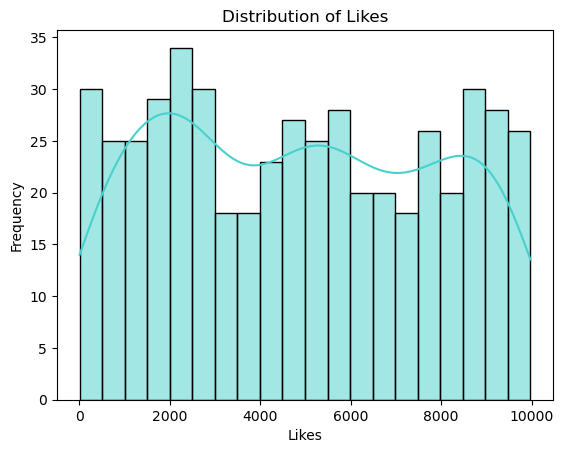

In [72]:
sns.histplot(data=df, x='Likes', color='mediumturquoise', bins=20, kde=True)
plt.xlabel("Likes")
plt.ylabel("Frequency")
plt.title("Distribution of Likes")

- The histogram suggests that there are two peaks in likes—one in the lower range (from 1000-3000 likes) and another in the higher range (from 7000-9000 likes). This could indicate that some types of posts perform significantly better than others.
- Some posts receive very few likes (<2000), while others perform exceptionally well (>7000). 	This suggests that either post quality varies or different content types resonate with different audience segments


#### 2. Create a boxplot with the x axis as ‘Category’, and the y axis as ‘Likes’

Text(0.5, 1.0, 'Likes by Category')

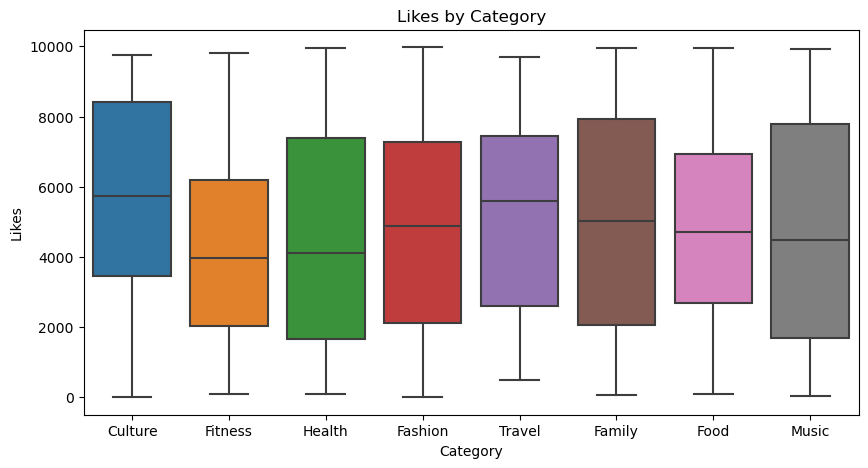

In [74]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='Category', y='Likes', data=df)
plt.xlabel("Category")
plt.ylabel("Likes")
plt.title("Likes by Category")

##### **Likes by Category Boxplot:**
- Culture: Highest median number of likes, suggesting strong engagement.
- Family: Second highest median number of likes.
- Fashion, Food, Music, Travel: These categories have similar medians, indicating consistent performance.
- Fitness and Health: Lower median likes, suggesting these areas might need a boost.

#### 3. Calculate the mean of the ‘Likes’ catregory

In [79]:
mean_likes = round(df['Likes'].mean(), 2)
print('The mean of the "Likes" is: ', mean_likes)

The mean of the "Likes" is:  4874.54


#### 4. Calculate the mean of each Category ‘Likes’

In [82]:
mean_category = round(df.groupby('Category')['Likes'].mean(), 2)
print('The mean of each Category "Likes"')
print(mean_category)

The mean of each Category "Likes"
Category
Culture    5751.36
Family     4947.71
Fashion    4754.66
Fitness    4407.18
Food       4763.48
Health     4442.92
Music      4709.78
Travel     5222.39
Name: Likes, dtype: float64


##### **Recomendations to Improve Social Media Performance:**
1. **Analyze and Focus on High-Performing Posts:**
- Identify posts in the 7000-9000+ likes range and analize their content type, captions, hashtags, posting time, and engagement style. Try to replicate the format of these successful posts.
- Continue to create and promote content in Culture and Family categories to leverage their existing popularity.
2. **Target and boost Low-Engagement Posts:**
- Analyze and determine why some posts received low likes (<2000). Experiment with better captions, trending hashtags, and interactive stories.
- Boost low-performing categories such as Fitness and Health by introducing fresh, engaging content, collaborations, or unique perspectives to increase.
3. **Leverage Virality Patterns:**
- The distribution has multiple peaks, suggesting certain types of content that go viral. Create more of the high-performing content and limit low-engagement post types.
4. **Optimize Posting Time:**
- Analize timestamps of high-like posts to determine the best time to post for maximum reach and engagement.
5. **Community Engagement:**
- Posts that receive mid-range likes (from 4000-6000) might benefit from more interaction with followers in comments, replies, and shares.